In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

### Autoscaling Axis

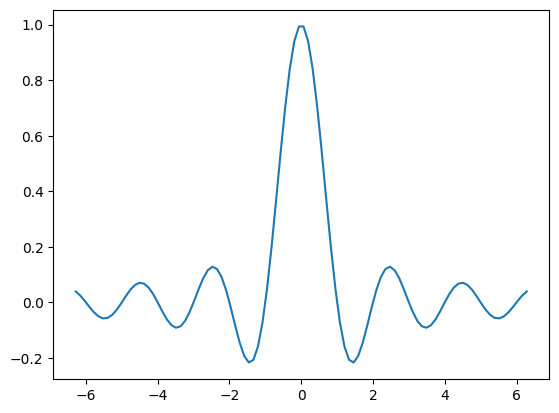

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sinc(x)

fig, ax = plt.subplots()
ax.plot(x, y)

### Margins

In [4]:
print(ax.margins())  # Default margins

(0.05, 0.05)


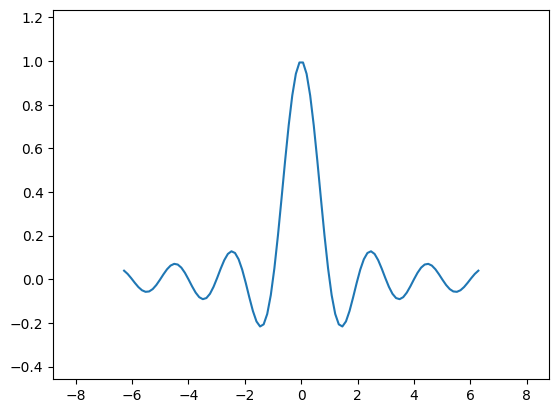

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(x=0.2, y=0.2)  # Set margins to 20% of data range

- In general, margins can be in the range (-0.5, ∞), where negative margins set the axes limits to a subrange of the data range, i.e. they clip data. Using a single number for margins affects both axes, a single margin can be customized using keyword arguments x or y, but positional and keyword interface cannot be combined.

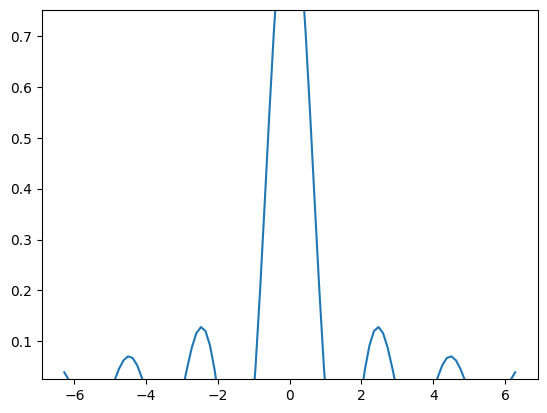

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(y=-0.2)  # Reduce y-margin by 20% of data range

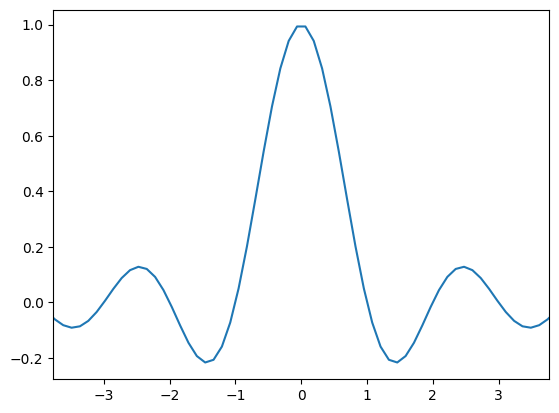

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(x=-0.2)  # Clip 20% of data on x-axis

### Sticky Edges

Text(0.5, 1.0, 'margins(0.2)')

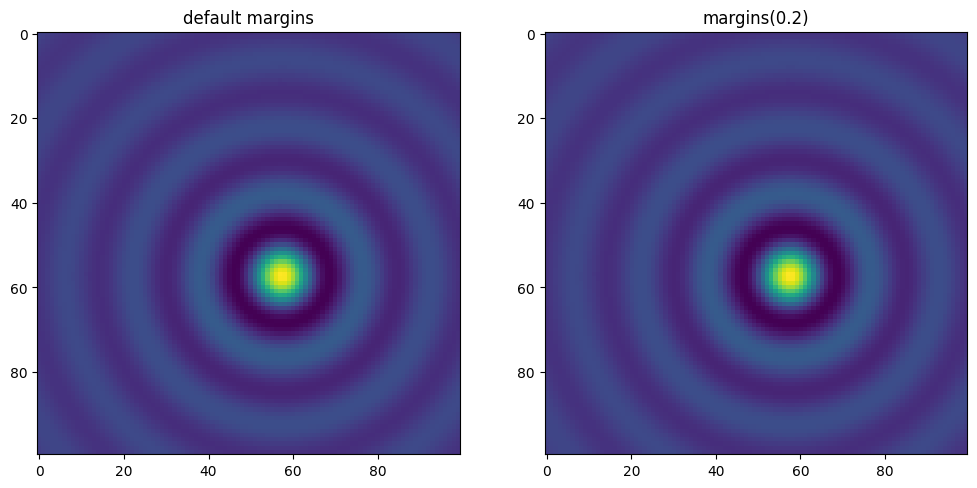

In [8]:
xx, yy = np.meshgrid(x, x)
zz = np.sinc(np.sqrt((xx - 1)**2 + (yy - 1)**2))

fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].imshow(zz)
ax[0].set_title("default margins")
ax[1].imshow(zz)
ax[1].margins(0.2)
ax[1].set_title("margins(0.2)")

Text(0.5, 1.0, 'default use_sticky_edges\nmargins(-0.2)')

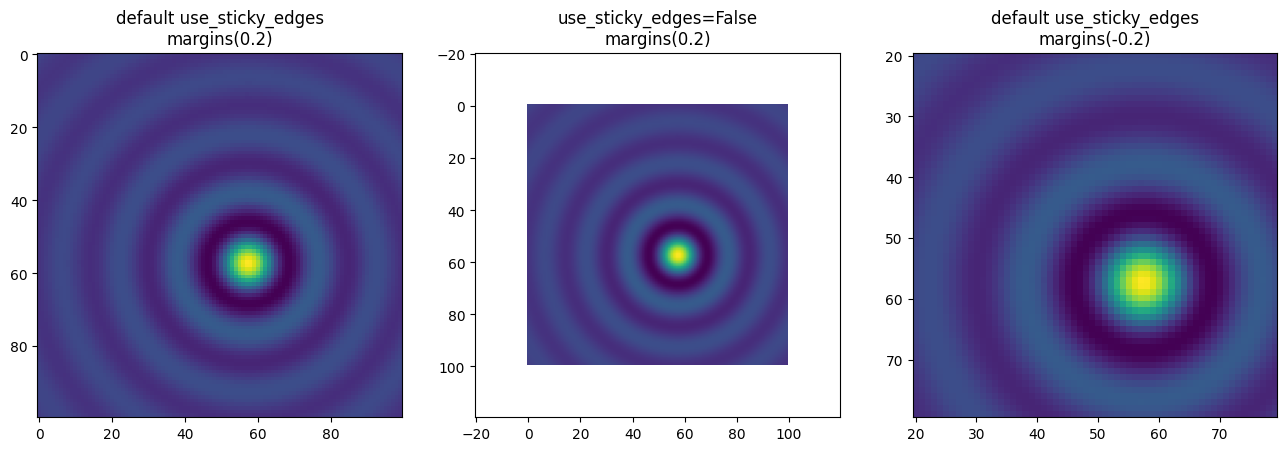

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 10))
ax[0].imshow(zz)
ax[0].margins(0.2)
ax[0].set_title("default use_sticky_edges\nmargins(0.2)")
ax[1].imshow(zz)
ax[1].margins(0.2)
ax[1].use_sticky_edges = False  # Override sticky edges
ax[1].set_title("use_sticky_edges=False\nmargins(0.2)")
ax[2].imshow(zz)
ax[2].margins(-0.2)
ax[2].set_title("default use_sticky_edges\nmargins(-0.2)")

### Controlling Autoscaling

Text(0.5, 1.0, 'Two curves')

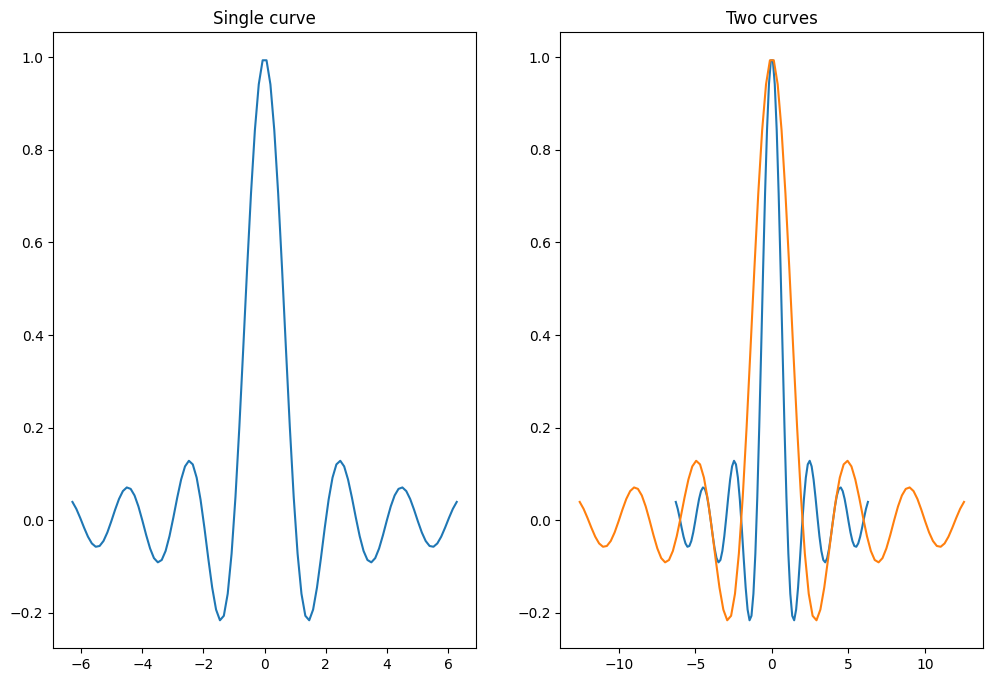

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].plot(x, y)
ax[0].set_title("Single curve")
ax[1].plot(x, y)
ax[1].plot(x * 2.0, y)
ax[1].set_title("Two curves")

- However, there are cases when you don't want to automatically adjust the viewport to new data.

- One way to disable autoscaling is to manually set the axis limit. Let's say that we want to see only a part of the data in greater detail. Setting the xlim persists even if we add more curves to the data. To recalculate the new limits calling Axes.autoscale will toggle the functionality manually.

Text(0.5, 1.0, 'set_xlim(left=-1, right=1)\nautoscale()')

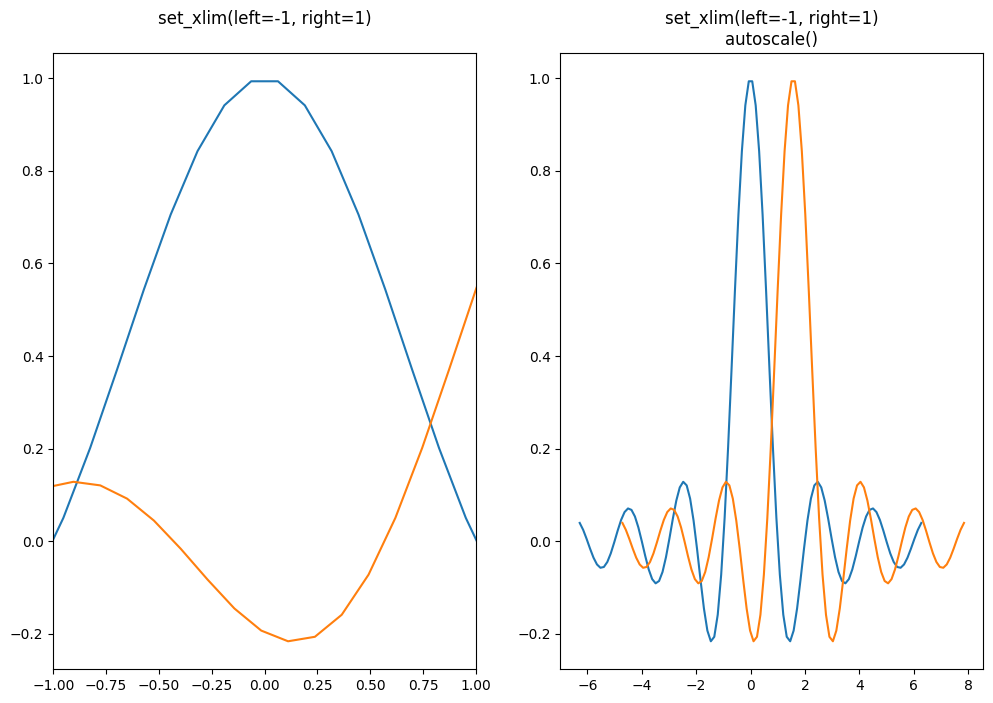

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].plot(x, y)
ax[0].set_xlim(left=-1, right=1)
ax[0].plot(x + np.pi * 0.5, y)
ax[0].set_title("set_xlim(left=-1, right=1)\n")
ax[1].plot(x, y)
ax[1].set_xlim(left=-1, right=1)
ax[1].plot(x + np.pi * 0.5, y)
ax[1].autoscale()
ax[1].set_title("set_xlim(left=-1, right=1)\nautoscale()")

- We can check that the first plot has autoscale disabled and that the second plot has it enabled again by using Axes.get_autoscale_on():

In [13]:
print(ax[0].get_autoscale_on())  # False means disabled
print(ax[1].get_autoscale_on())  # True means enabled -> recalculated

False
True


- Arguments of the autoscale function give us precise control over the process of autoscaling. A combination of arguments enable, and axis sets the autoscaling feature for the selected axis (or both). The argument tight sets the margin of the selected axis to zero. To preserve settings of either enable or tight you can set the opposite one to None, that way it should not be modified. However, setting enable to None and tight to True affects both axes regardless of the axis argument.

(0, 0)


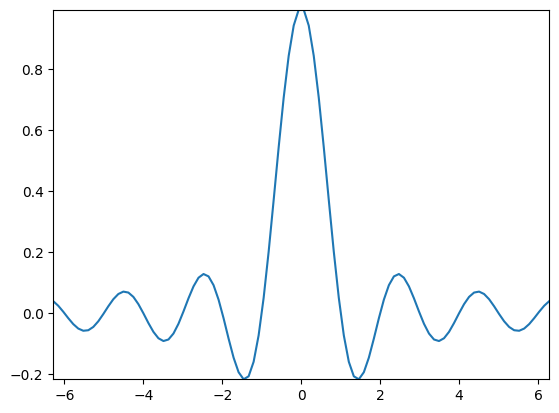

In [14]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(0.2, 0.2)
ax.autoscale(enable=None, axis="x", tight=True)

print(ax.margins())

### Working with Collections

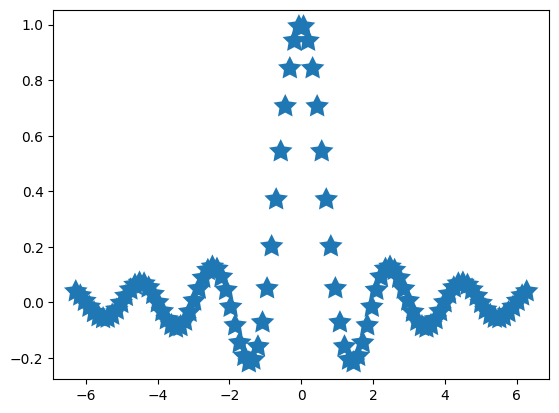

In [15]:
fig, ax = plt.subplots()
collection = mpl.collections.StarPolygonCollection(
    5, rotation=0, sizes=(250,),  # five point star, zero angle, size 250px
    offsets=np.column_stack([x, y]),  # Set the positions
    offset_transform=ax.transData,  # Propagate transformations of the Axes
)
ax.add_collection(collection)
ax.autoscale_view()